# **Comprehensive Analysis and Predictive Assessment of User Feedback for ChatGPT: Unveiling Insights into Pros and Cons**

## *By Nakul Sharma*

## dataset Overview

**chatgpt_reviews dfset(csv_file):**

**Columns:**
1. **Date and Time:** Timestamp of each review.
2. **Title:** Brief summary capturing the review's essence.
3. **Review:** Detailed feedback and opinions from users.
4. **Rating:** Numerical scale (1 to 5) representing user satisfaction.

**Objective:**
- Comprehensive analysis of user sentiments.
- Identification of pros and cons through review insights.
- Predictive assessment for future trends and challenges in natural language processing.

#### ***Importing the necessary libraries***

In [56]:
# df manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text processing and NLP
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from textblob import TextBlob
import spacy
import re
import json,os,uuid
from nltk.tokenize import RegexpTokenizer

#To ignore unecessary warnings
import warnings
warnings.filterwarnings('ignore')

# Date and time manipulation
from datetime import datetime

# Machine learning (for predictive analysis)
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set visualization style
sns.set(style="whitegrid")

#### ***Creating some functions which will be used in our model evaluation***

In [57]:
def eval(y_test,y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    print(f'Accuracy: {accuracy:.2f}')
    print('\nConfusion Matrix:')
    print(conf_matrix)
    print('\nClassification Report:')
    print(classification_rep)

#### ***Loading the dataset using pandas datafame function***

In [58]:
df = pd.read_csv("C://Users//Admin//Downloads//chatgpt_reviews.csv")
df.head()

,date,title,review,rating
0,2023-05-21 16:42:24,Much more accessible for blind users than the ...,Up to this point I’ve mostly been using ChatGP...,4
1,2023-07-11 12:24:19,"Much anticipated, wasn’t let down.",I’ve been a user since it’s initial roll out a...,4
2,2023-05-19 10:16:22,"Almost 5 stars, but… no search function",This app would almost be perfect if it wasn’t ...,4
3,2023-05-27 21:57:27,"4.5 stars, here’s why","I recently downloaded the app and overall, it'...",4
4,2023-06-09 07:49:36,"Good, but Siri support would take it to the ne...",I appreciate the devs implementing Siri suppor...,4


In [59]:
df.dtypes

date      object
title     object
review    object
rating     int64
dtype: object

In [60]:
# Convert the 'date' column from object to datetime
df['date'] = pd.to_datetime(df['date'])

# Verify the changes
df.dtypes

date      datetime64[ns]
title             object
review            object
rating             int64
dtype: object

In [61]:
# Getting the rows and columns of the dft
df.shape

(2292, 4)

In [62]:
# Getting a  small information for the whole df
df.info

<bound method DataFrame.info of                     date                                              title  \
0    2023-05-21 16:42:24  Much more accessible for blind users than the ...   
1    2023-07-11 12:24:19                 Much anticipated, wasn’t let down.   
2    2023-05-19 10:16:22            Almost 5 stars, but… no search function   
3    2023-05-27 21:57:27                              4.5 stars, here’s why   
4    2023-06-09 07:49:36  Good, but Siri support would take it to the ne...   
...                  ...                                                ...   
2287 2023-05-19 00:17:04                      Andrew Justino Wilson 5/19/23   
2288 2023-05-18 19:13:28                                          Superb AI   
2289 2023-05-18 18:27:04           Fantastic App with Room for Enhancements   
2290 2023-05-18 17:17:44             Awesome technology, deplorable tactics   
2291 2023-07-25 00:50:20            I like how there r no limits thanks <33   

                   

In [63]:
# the value counts of the rating column 
df['rating'].value_counts()
# we can see that there's more people who has provided a 5 star rating to the app 

rating
5    1134
1     495
4     304
3     220
2     139
Name: count, dtype: int64

In [64]:
# checking the null values
df.isnull().sum()

date      0
title     0
review    0
rating    0
dtype: int64

In [65]:
#Getting a quick statistical description for the dataset
df.describe(include='all')

,date,title,review,rating
count,2292,2292,2292,2292.000000
unique,NaN,2058,2257,NaN
top,NaN,Finally,Great,NaN
freq,NaN,13,7,NaN
mean,2023-05-29 12:21:37.548865792,NaN,NaN,3.629581
min,2023-05-18 15:43:36,NaN,NaN,1.000000
25%,2023-05-19 06:00:02,NaN,NaN,2.000000
50%,2023-05-20 17:40:39,NaN,NaN,4.000000
75%,2023-05-31 13:00:18,NaN,NaN,5.000000
max,2023-07-25 01:25:35,NaN,NaN,5.000000


#### ***Performing some EDA & Visualizations to understand the user approch about the app***

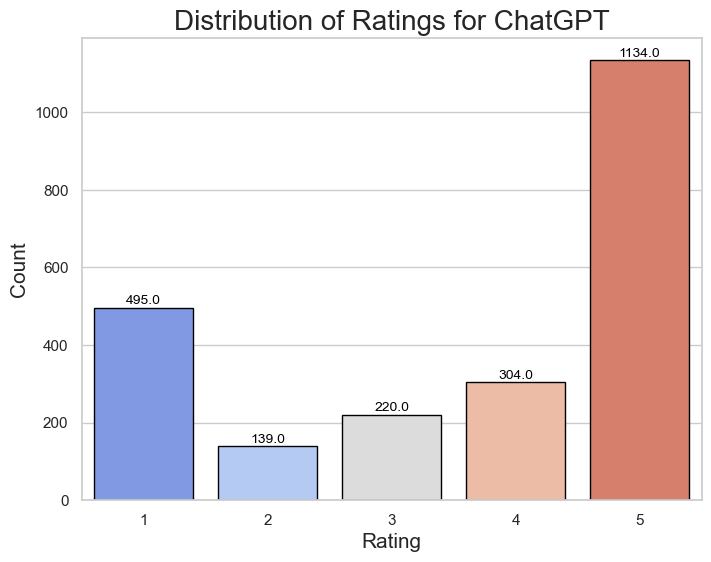

In [66]:
# Visualize the distribution of ratings with count annotations
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='rating', data=df, palette='coolwarm',edgecolor = 'black')

# Annotate count values above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Ratings for ChatGPT',fontsize=20)
plt.xlabel('Rating',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

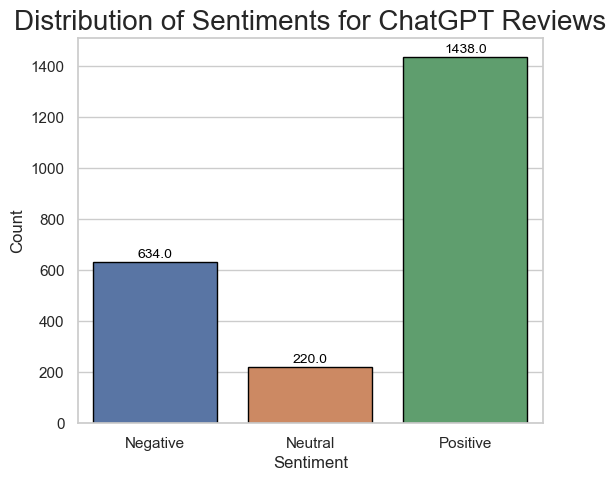

In [67]:
# Categorize ratings into positive, negative, or neutral sentiments
df['Sentiment'] = pd.cut(df['rating'], bins=[0, 2, 3, 5], labels=['Negative', 'Neutral', 'Positive'], include_lowest=True)

# Visualize the distribution of sentiments with count annotations
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='Sentiment', data=df, edgecolor='black')

# Annotate count values above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Sentiments for ChatGPT Reviews',fontsize=20)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

#### ***Data preprocessing***

In [68]:
#Combine Review Time and Review
df['complete_review'] = df['title'] +' .'+df['review']
df.head()

,date,title,review,rating,Sentiment,complete_review
0,2023-05-21 16:42:24,Much more accessible for blind users than the ...,Up to this point I’ve mostly been using ChatGP...,4,Positive,Much more accessible for blind users than the ...
1,2023-07-11 12:24:19,"Much anticipated, wasn’t let down.",I’ve been a user since it’s initial roll out a...,4,Positive,"Much anticipated, wasn’t let down. .I’ve been ..."
2,2023-05-19 10:16:22,"Almost 5 stars, but… no search function",This app would almost be perfect if it wasn’t ...,4,Positive,"Almost 5 stars, but… no search function .This ..."
3,2023-05-27 21:57:27,"4.5 stars, here’s why","I recently downloaded the app and overall, it'...",4,Positive,"4.5 stars, here’s why .I recently downloaded t..."
4,2023-06-09 07:49:36,"Good, but Siri support would take it to the ne...",I appreciate the devs implementing Siri suppor...,4,Positive,"Good, but Siri support would take it to the ne..."


In [69]:
# Dropping the columns which we'll not require in furthur sentiment analysis
df.drop(['title','review','date','Sentiment'],axis=1,inplace=True)

In [70]:
#Convert all the reviews to lowercase
df['complete_review'] = df['complete_review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['complete_review'].head()

0    much more accessible for blind users than the ...
1    much anticipated, wasn’t let down. .i’ve been ...
2    almost 5 stars, but… no search function .this ...
3    4.5 stars, here’s why .i recently downloaded t...
4    good, but siri support would take it to the ne...
Name: complete_review, dtype: object

In [71]:
#Remove Punctuation
df['complete_review'] = df['complete_review'].str.replace('[^\w\s]','')

In [72]:
import string

df['complete_review'] = df['complete_review'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df['complete_review'].head()

0    much more accessible for blind users than the ...
1    much anticipated wasn’t let down i’ve been a u...
2    almost 5 stars but… no search function this ap...
3    45 stars here’s why i recently downloaded the ...
4    good but siri support would take it to the nex...
Name: complete_review, dtype: object

In [73]:
#Remove Emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df['complete_review'] = df['complete_review'].apply(lambda x: remove_emoji(x))
df['complete_review'].head()

0    much more accessible for blind users than the ...
1    much anticipated wasn’t let down i’ve been a u...
2    almost 5 stars but… no search function this ap...
3    45 stars here’s why i recently downloaded the ...
4    good but siri support would take it to the nex...
Name: complete_review, dtype: object

In [74]:
#Remove Stopwords
stop = stopwords.words('english')
df['complete_review'] = df['complete_review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [75]:
'''the provided line of code loads a spaCy language processing pipeline with a specific English language model ("en_core_web_sm").It disables the parser 
and named entity recognizer components to optimize processing speed, particularly when those functionalitiesare not required for the given task. 
The resulting nlp object can be used for various natural language processing tasks on English text.'''
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

In [76]:
#Apply Lemmatization
def space(comment):
    doc = nlp(comment)
    return " ".join([token.lemma_ for token in doc])

df['complete_review'] = df['complete_review'].apply(space)

In [77]:
#These are specific to app and won't show any sentiments
words_to_remove = ['chatgpt','app','chatgpts','chat','gpt','iphone','ipad','gpt4','phone','number','ai','use','io']
df['complete_review'] = df['complete_review'].apply(lambda x: " ".join(x for x in x.split() if x not in words_to_remove))

***Map ratings to positive, negative & neutral sentiment***<br>
Here's how the mapping works:

1. If the rating is greater than 3, it is assigned a sentiment value of 2 (positive).
2. If the rating is equal to 3, it is assigned a sentiment value of 1 (neutral).
3. If the rating is less than 3, it is assigned a sentiment value of 0 (negative).

In [78]:
df['sentiment'] = df['rating'].apply(lambda rating: 2 if rating > 3 else (1 if rating == 3 else 0))
df.head()

,rating,complete_review,sentiment
0,4,much accessible blind user web version point I...,2
1,4,much anticipate be not let I ’ve user since it...,2
2,4,almost 5 star but … search function would almo...,2
3,4,45 star here ’ recently download overall great...,2
4,4,good siri support would take next level apprec...,2


In [79]:
df['sentiment'].value_counts(normalize=True).mul(100).round(2)

sentiment
2    62.74
0    27.66
1     9.60
Name: proportion, dtype: float64

The sentiment column is imbalanced as:<br>
positive(2) is 62.74%<br>
neutral(0) is 27.66%<br>
negative(1) is 9.60%

##### ***Sentiment analysis of the Review and sentiments column***
There are two ways:<br>
**1st** *To take all the three sentiment in one loop and generate a wordcloud*<br>
**2nd** *showcasing all the sentiments one by one in a wordcloud*

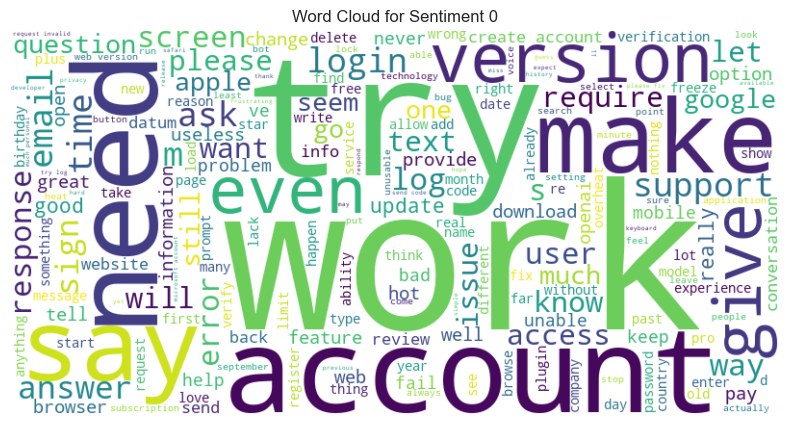

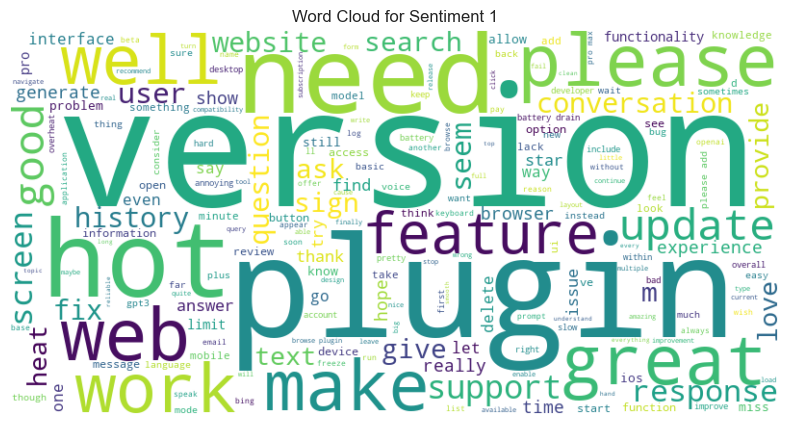

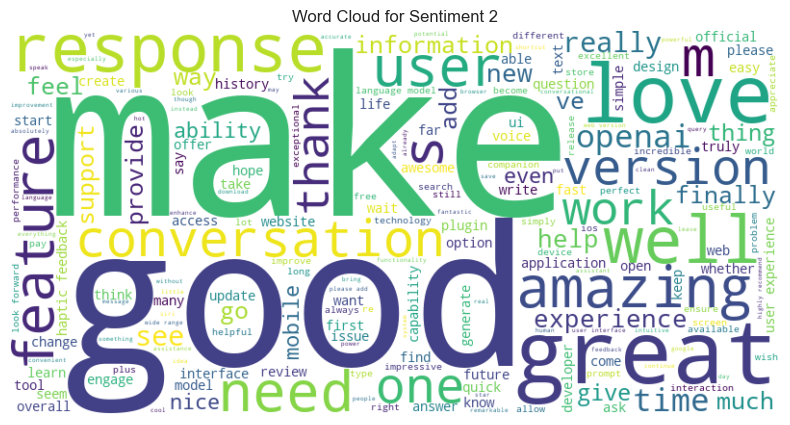

In [80]:
#First way----->
sentiments = [0, 1, 2]
for sentiment in sentiments:
    text = ' '.join(df[df['sentiment'] == sentiment]['complete_review'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Sentiment {sentiment}')
    plt.show()

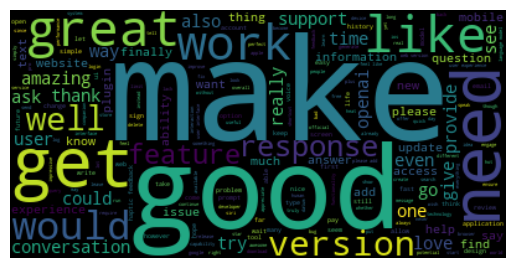

In [81]:
#Analysis of Review field
stopword = set(stopwords.words('english'))
text = " ".join(review for review in df.complete_review)
wordcloud = WordCloud(stopwords=stopword).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [82]:
#positive negative & neutral sentiment:
positive = df[df['sentiment'] == 2]
negative = df[df['sentiment'] == 0]
neutral = df[df['sentiment'] == 1]

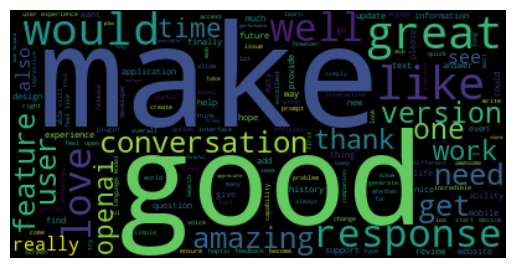

In [83]:
#Positive Setiment
stopword = set(stopwords.words('english'))
text = " ".join(review for review in positive.complete_review)
wordcloud = WordCloud(stopwords=stopword).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

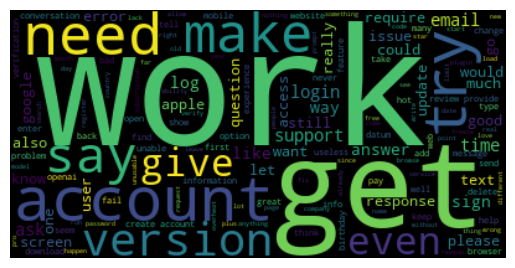

In [84]:
#Negative Setiment
stopword = set(stopwords.words('english'))
text = " ".join(review for review in negative.complete_review)
wordcloud = WordCloud(stopwords=stopword).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

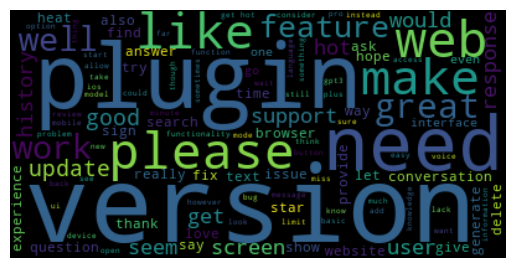

In [85]:
#Neutral Sentiment
stopword = set(stopwords.words('english'))
text = " ".join(review for review in neutral.complete_review)
wordcloud = WordCloud(stopwords=stopword).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## ***Sentimental Analysis Predictive Model***
### ***Using Machine Learning & NLP***

In [86]:
#Selecting X & Y
# Assuming 'complete_review' is the preprocessed text column and 'sentiment' is the target column
x = df['complete_review']
y = df['sentiment']
print(f'The shape X is{x.shape} & its type is {type(x)}')
print(f'The shape Y is{y.shape} & its type is {type(y)}')

The shape X is(2292,) & its type is <class 'pandas.core.series.Series'>
The shape Y is(2292,) & its type is <class 'pandas.core.series.Series'>


In [87]:
# Split the data into training and testing sets
# We select 20% as the testing data that is 459 out of 2292
# and the remaining as the training data that is 1833 out of 2292
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f'The shape of x_train is{x_train.shape} & x_test is{x_test.shape}')
print(f'The shape of y_train is{y_train.shape} & y_test is{y_test.shape}')

The shape of x_train is(1833,) & x_test is(459,)
The shape of y_train is(1833,) & y_test is(459,)


In [88]:
# Create a CountVectorizer with  specific parameters as we've to control the imbalance of the sentiment column
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english', ngram_range=(1, 1), tokenizer=token.tokenize)

In [89]:
# Fit and transform the training data
x_train_vectorized = cv.fit_transform(x_train)

# Transform the testing data
x_test_vectorized = cv.transform(x_test)

In [90]:
# Build a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(x_train_vectorized, y_train)

MultinomialNB()

In [91]:
# Predictions for Naive Bayes classifier
y_pred_vtc = classifier.predict(x_test_vectorized)

In [92]:
eval(y_test,y_pred_vtc)

Accuracy: 0.76

Confusion Matrix:
[[ 92   5  30]
 [ 17   0  22]
 [ 31   6 256]]

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.72      0.69       127
           1       0.00      0.00      0.00        39
           2       0.83      0.87      0.85       293

    accuracy                           0.76       459
   macro avg       0.50      0.53      0.51       459
weighted avg       0.71      0.76      0.73       459



In [93]:
# Build a Logistic Regression classifier
LR = LogisticRegression(random_state=42)
LR.fit(x_train_vectorized, y_train)

LogisticRegression(random_state=42)

In [94]:
# Predictions
y_pred_lgst = LR.predict(x_test_vectorized)

In [95]:
eval(y_test,y_pred_lgst)

Accuracy: 0.74

Confusion Matrix:
[[ 77   9  41]
 [ 15   4  20]
 [ 22  11 260]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.61      0.64       127
           1       0.17      0.10      0.13        39
           2       0.81      0.89      0.85       293

    accuracy                           0.74       459
   macro avg       0.55      0.53      0.54       459
weighted avg       0.72      0.74      0.73       459



In [96]:
# Build a Random Forest classifier
RFC = RandomForestClassifier(random_state=42)
RFC.fit(x_train_vectorized, y_train)

RandomForestClassifier(random_state=42)

In [97]:
# Predictions
y_pred_rfc = RFC.predict(x_test_vectorized)

In [98]:
eval(y_test,y_pred_rfc)

Accuracy: 0.76

Confusion Matrix:
[[ 75   1  51]
 [ 13   0  26]
 [ 19   0 274]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.59      0.64       127
           1       0.00      0.00      0.00        39
           2       0.78      0.94      0.85       293

    accuracy                           0.76       459
   macro avg       0.49      0.51      0.50       459
weighted avg       0.69      0.76      0.72       459



In [99]:
# Build an AdaBoost classifier
adc = AdaBoostClassifier(random_state=42)
adc.fit(x_train_vectorized, y_train)

AdaBoostClassifier(random_state=42)

In [100]:
y_pred_adc = adc.predict(x_test_vectorized)

In [101]:
eval(y_test,y_pred_adc)

Accuracy: 0.70

Confusion Matrix:
[[ 52   8  67]
 [  4   7  28]
 [ 21  11 261]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.41      0.51       127
           1       0.27      0.18      0.22        39
           2       0.73      0.89      0.80       293

    accuracy                           0.70       459
   macro avg       0.56      0.49      0.51       459
weighted avg       0.68      0.70      0.67       459



In [102]:
# Build an XGBoost classifier
xgbc = XGBClassifier(random_state=42)
xgbc.fit(x_train_vectorized, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [103]:
# Predictions
y_pred_xgbc = xgbc.predict(x_test_vectorized)

In [104]:
eval(y_test,y_pred_xgbc)

Accuracy: 0.74

Confusion Matrix:
[[ 78   5  44]
 [ 12   4  23]
 [ 24  10 259]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.61      0.65       127
           1       0.21      0.10      0.14        39
           2       0.79      0.88      0.84       293

    accuracy                           0.74       459
   macro avg       0.56      0.53      0.54       459
weighted avg       0.71      0.74      0.73       459



### ***Creating a loop where were going to load differnt classifier and checking all their predictions using evaluation metrics and other evaluations***

In [105]:
# Initialize different classification models
models = {
    'Naive Bayes classifier': MultinomialNB(),
    'XGBoost classifier':XGBClassifier(),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest Classifier': RandomForestClassifier(random_state=42),
    'Gradient Boosting Classifier': GradientBoostingClassifier(random_state=42)
}
# Train and evaluate each model
best_model = None
best_accuracy = -float('inf')

for model_name, model in models.items():
    # Split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Create a CountVectorizer with your specified parameters
    token = RegexpTokenizer(r'[a-zA-Z0-9]+')
    cv = CountVectorizer(stop_words='english', ngram_range=(1, 1), tokenizer=token.tokenize)

    # Fit and transform the training data
    x_train_vectorized = cv.fit_transform(x_train)

    # Transform the testing data
    x_test_vectorized = cv.transform(x_test)

    # Train the model
    model.fit(x_train_vectorized, y_train)

    # Make predictions on the test set
    y_pred = model.predict(x_test_vectorized)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Training and testing scores
    training_score = model.score(x_train_vectorized, y_train)
    testing_score = model.score(x_test_vectorized, y_test)

    # Print evaluation metrics
    print(f'Model: {model_name}')
    print(f'Model: {model_name}')
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R-squared: {r2}')
    print('\n')
    print('-----------------------------------')
    print(f'Training Score: {training_score}')
    print(f'Testing Score: {testing_score}')
    print('\n')
    print('-----------------------------------')
    print(f'Accuracy: {accuracy:.2f}')
    print('\nConfusion Matrix:')
    print(conf_matrix)
    print('-----------------------------------')

    # Update the best model if needed
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model_name

print(f'Best Model: {best_model} with Accuracy: {best_accuracy:.2f}')

Model: Naive Bayes classifier
Model: Naive Bayes classifier
Mean Squared Error: 0.6405228758169934
Mean Absolute Error: 0.3747276688453159
R-squared: 0.18325424877741736


-----------------------------------
Training Score: 0.8548827059465357
Testing Score: 0.7581699346405228


-----------------------------------
Accuracy: 0.76

Confusion Matrix:
[[ 92   5  30]
 [ 17   0  22]
 [ 31   6 256]]
-----------------------------------
Model: XGBoost classifier
Model: XGBoost classifier
Mean Squared Error: 0.7015250544662309
Mean Absolute Error: 0.40522875816993464
R-squared: 0.10546893913717137


-----------------------------------
Training Score: 0.9143480632842335
Testing Score: 0.7429193899782135


-----------------------------------
Accuracy: 0.74

Confusion Matrix:
[[ 78   5  44]
 [ 12   4  23]
 [ 24  10 259]]
-----------------------------------
Model: Logistic Regression
Model: Logistic Regression
Mean Squared Error: 0.6688453159041394
Mean Absolute Error: 0.39433551198257083
R-squared: 

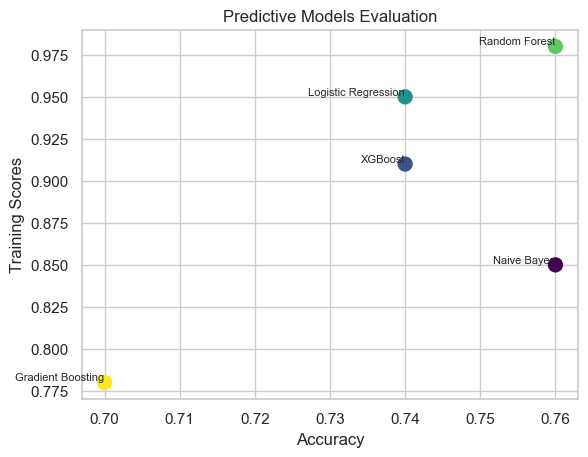

In [110]:
# Define model names and corresponding accuracy and R-squared values
model_names = ['Naive Bayes', 'XGBoost', 'Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracy_values = [0.76, 0.74, 0.74, 0.76, 0.70]  # Replace with actual accuracy values
r_squared_values = [0.85, 0.91, 0.95, 0.98, 0.78]  # Replace with actual R-squared values

# Define color palette based on accuracy and R-squared
colors = plt.cm.viridis(np.linspace(0, 1, len(model_names)))

# Create a 4-box plot
fig, ax = plt.subplots()

# Scatter plot with color based on accuracy and R-squared
scatter = ax.scatter(accuracy_values, r_squared_values, c=colors, s=100)

# Add labels and title
ax.set_xlabel('Accuracy')
ax.set_ylabel('Training Scores')
ax.set_title('Predictive Models Evaluation')

# Add model names as annotations
for i, model_name in enumerate(model_names):
    ax.annotate(model_name, (accuracy_values[i], r_squared_values[i]), fontsize=8, ha='right', va='bottom')

# Show the plot
plt.show()


### ***So the best model is random forest classifier.We are going to load all the predicted in our dataset for the predictive analysis***

In [ ]:
X_vectorized = cv.transform(x)
df['predicted_sentiment'] = RFC.predict(X_vectorized)

In [ ]:
# Calculate the accuracy on the entire dataset
overall_accuracy = accuracy_score(y, df['predicted_sentiment'])
print(f'Overall Accuracy: {overall_accuracy:.2f}')

Overall Accuracy: 0.94


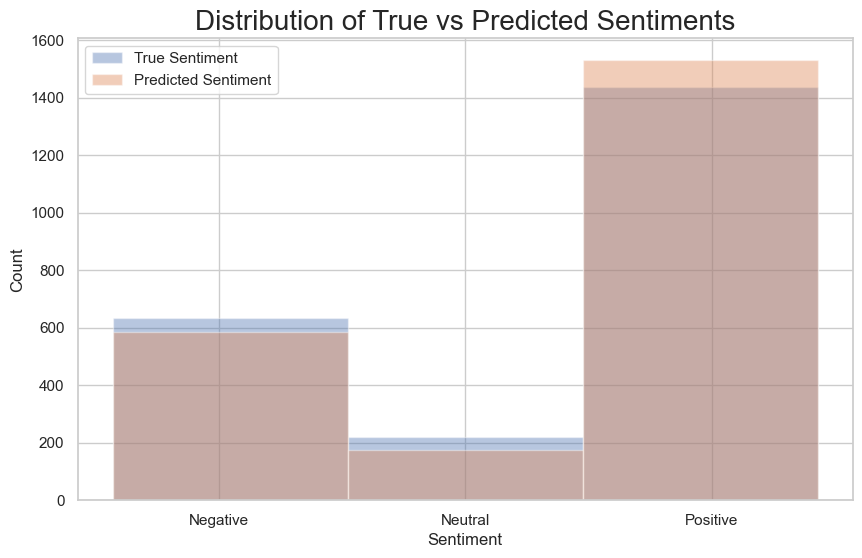

In [ ]:
# Assuming 'sentiment' is the true sentiment and 'predicted_sentiment' is the predicted sentiment
true_sentiment = df['sentiment']
predicted_sentiment = df['predicted_sentiment']

# Create a distplot
plt.figure(figsize=(10, 6))
sns.distplot(true_sentiment, kde=False, bins=3, label='True Sentiment')
sns.distplot(predicted_sentiment, kde=False, bins=3, label='Predicted Sentiment')

plt.title('Distribution of True vs Predicted Sentiments',fontsize = 20)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0.3, 1, 1.7], ['Negative', 'Neutral', 'Positive'])
plt.legend()
plt.show()

#### ***Conclusion:***
##### Looking at the above bar Count plot we can see that the prediction of reviews is tend to increase more for the positive sentiment and the reviews for negative and neutral sentriments is decreasing. Thus, we can conclude based on the prediction that the app ChatGPT is more likely to get positive comments from the reviewers decreading the negative and neutral thoughts.

In [ ]:
#saving the predicted values to csv file
#df.to_csv('predicted_data.csv')

NOTE : All the prediction are just a probalility of the ML models. These are just predicted using the past review.

This image is the flowchart of of my research paper about Comprehensive Analysis and Predictive Assessment of User Feedback for ChatGPT: Unveiling Insights into Pros and Cons 
This diagram is showing all the steps i've conducted in my reseach by using the chat gpt user reviews dataset.
Our aim was to do a sentimental and predictive analysis from the data source 
first were going to pre process the data by 
### ***Thank_You***